In [69]:
#Importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
import gc
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading Dataset
df=pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
print(df.shape)
df.info()
#data is numeric

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#cheking null values
print(df.isnull().values.any())
df.isnull().sum()
#no null values present in the data set

False


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Understanding the data by visualizing**



age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: age, dtype: int64
----------------------------------------------------------------------
sex [1 0]
0     96
1    207
Name: sex, dtype: int64
----------------------------------------------------------------------
cp [3 2 1 0]
0    143
1     50
2     87
3     23
Name: cp, dtype: int64
----------------------------------------------------------------------
trtbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180

<Figure size 432x288 with 0 Axes>

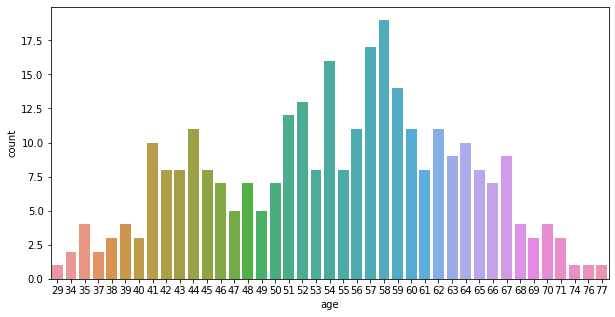

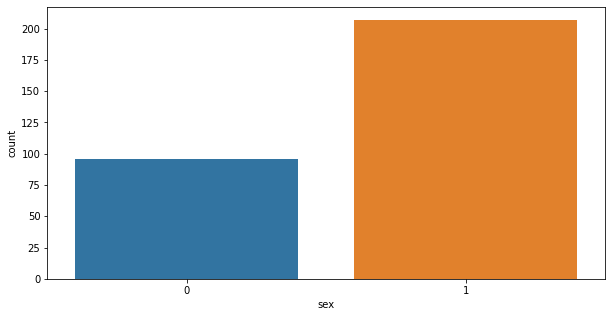

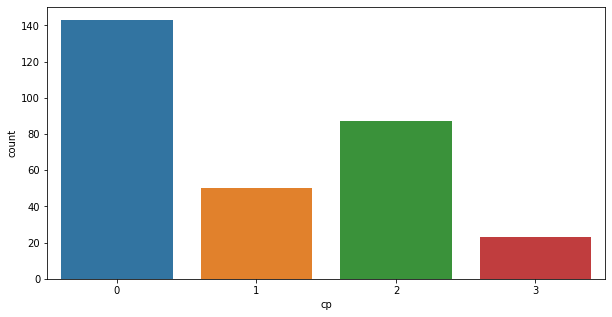

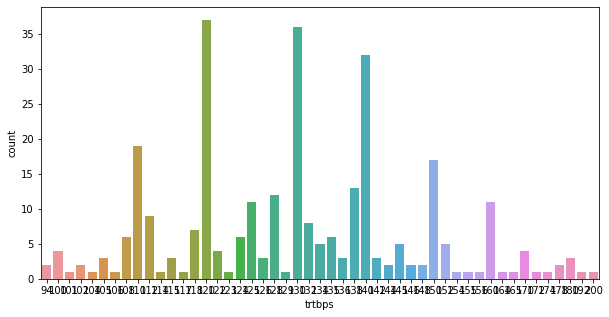

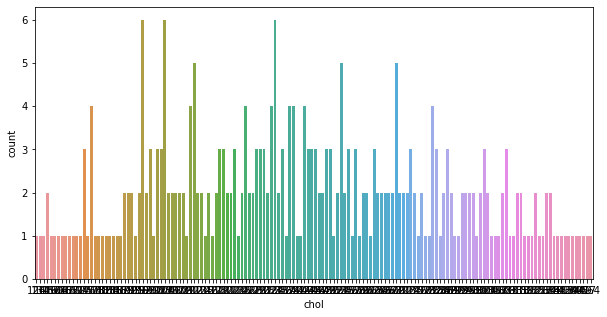

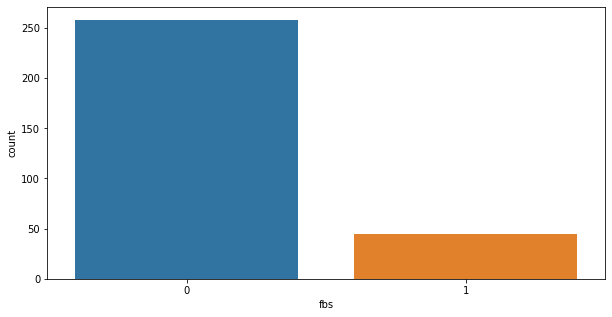

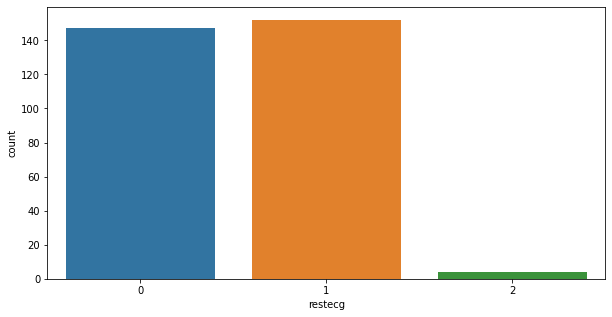

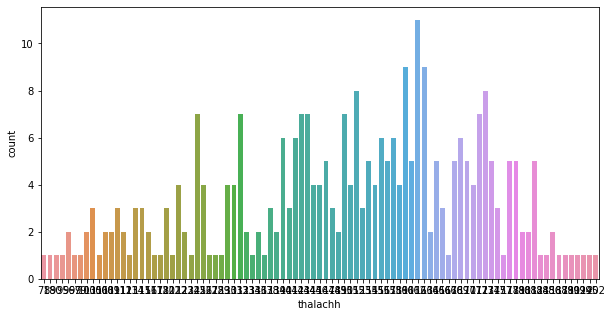

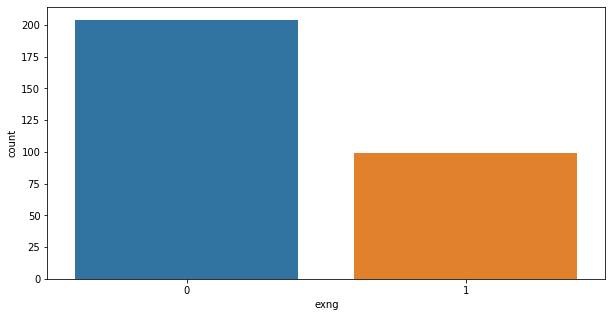

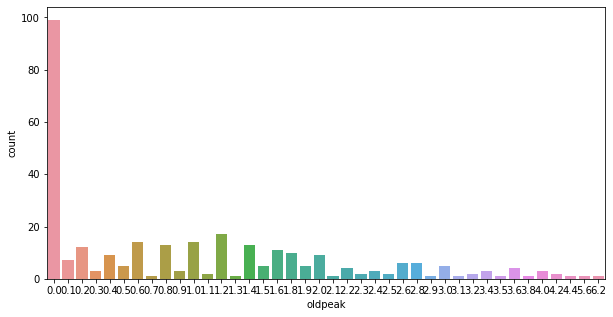

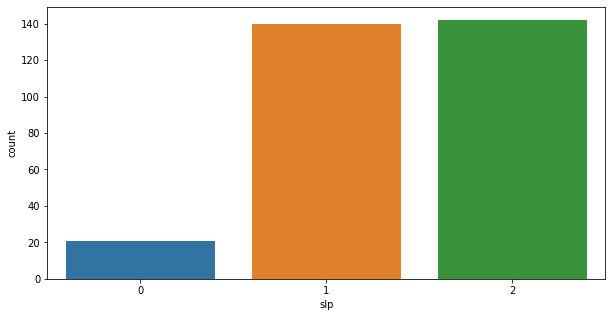

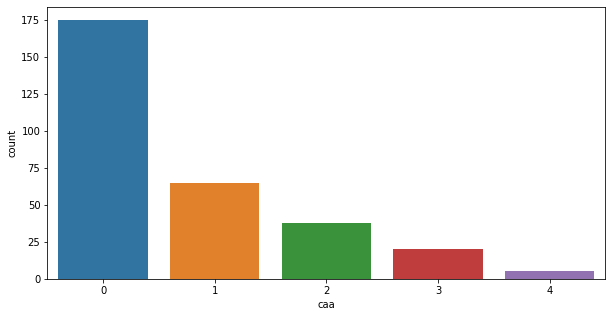

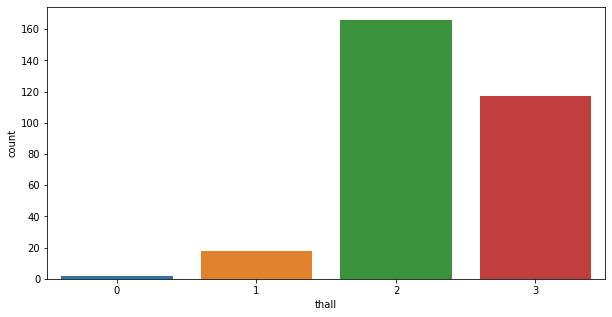

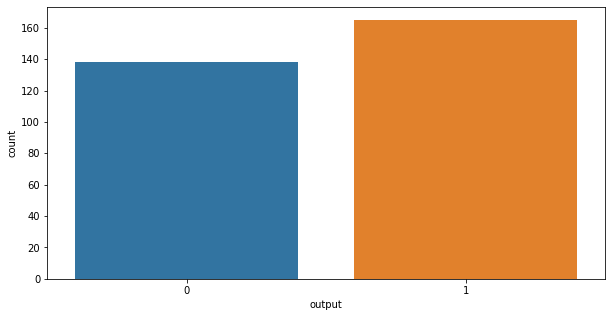

In [6]:
plt.tight_layout()
#univariate analysis
for i in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    print(i,df[i].unique())
    print(df[i].value_counts().sort_index())
    print("----------------------------------------------------------------------")

*****Observations:*****
* Different age group people are there in given data set
* Assuming 0 as female and 1 as male and fact says that males do have more chances       of heartattack,so in this data set label 1 is considered as males and vice versa.
* More count of people with type 1 Chest pain and very few with type 4 can be observed in the above visualization
* As per my research,normal bp is considered to be upto 80/120 mm Hg but there are many people who have bp more than 140 mm Hg and one person even have bp upto 200 mm Hg which is too high 
* As per my research,Cholestrol level below 200 mg/dl  is considered to be normal and between 200 and 239  is considered to be borderline and more than 240  mg/dl is considered to be high cholestrol level,we can observe in above visulaization one person is having as high 564 mg/dl.
* Very few people have diabetes ,it is clear from above visulization
* We can observe that among people who have done ECG,more of them were having ST-T wave abnormality 
* Normal Heart rate or pulse rate is b/w 50-100 but in visualization above we can observe a person was having pulse rate as high as 202
* In above visulisation ,it is observed that less people had angima(chest pain caused by reduced blood flow to heart)
* oldpeak is measure of ST depression induced by exercise relative to rest
* sip here is the slope of the peak exercise ST segment(as per my research)
* thal is also a heart disease ,may be its are given,and we can observe that more count of people have type 2 thal.



In [7]:
#lets check coorelation matrix
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

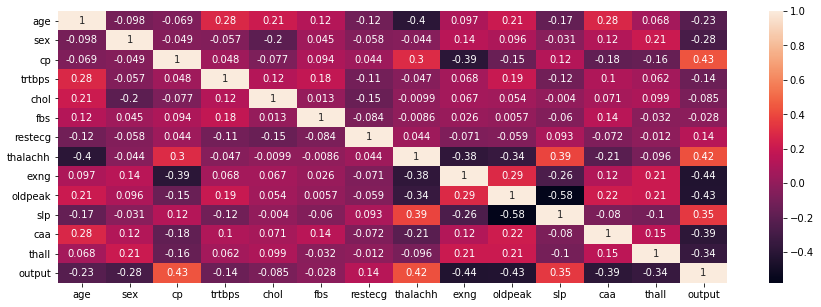

In [8]:
#visulaising the correlation matrix
plt.tight_layout()
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),cbar="viridius",annot=True)
#it is observed that attributes are not so highly correlated 

<AxesSubplot:xlabel='output', ylabel='count'>

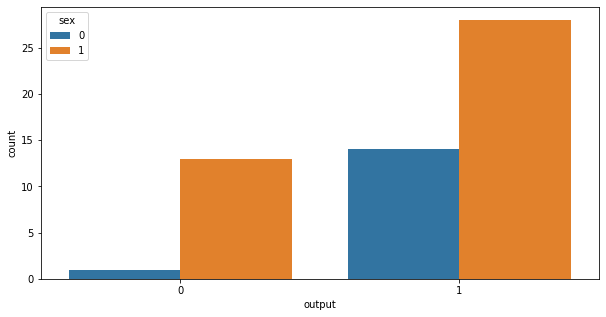

In [9]:
#Bivariate Analysis
#lets divide the age group and see tha chances of heart attack among age<45,45>and<=60 , >60
plt.figure(figsize=(10,5))
age_less_45=df[df["age"]<45]
sns.countplot(x="output",hue="sex",data=age_less_45)

<AxesSubplot:xlabel='output', ylabel='count'>

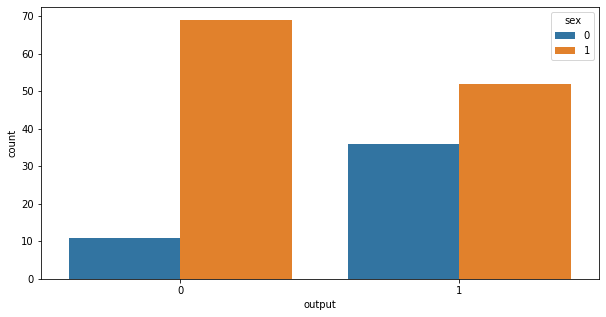

In [10]:
plt.figure(figsize=(10,5))
age_bw_45_60=df[(df["age"]>=45) & (df["age"]<=60)]
sns.countplot(x="output",hue="sex",data=age_bw_45_60)

<AxesSubplot:xlabel='output', ylabel='count'>

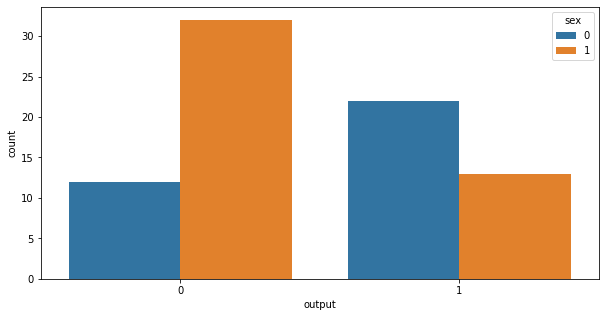

In [11]:
plt.figure(figsize=(10,5))
age_grtr_60=df[df["age"]>60]
sns.countplot(x="output",hue="sex",data=age_grtr_60)

**Observation:**
comparing above age group results-it is observed that  people b/w age group of 45-60 are having  more heartattack chances and among them majority  are males.

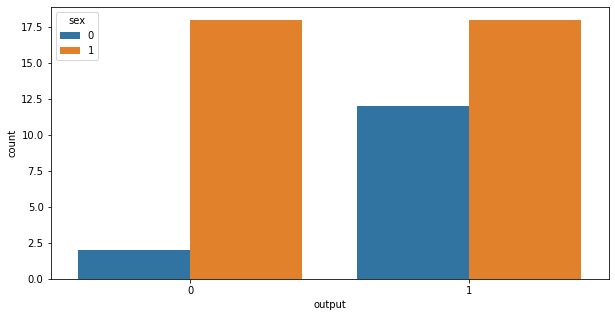

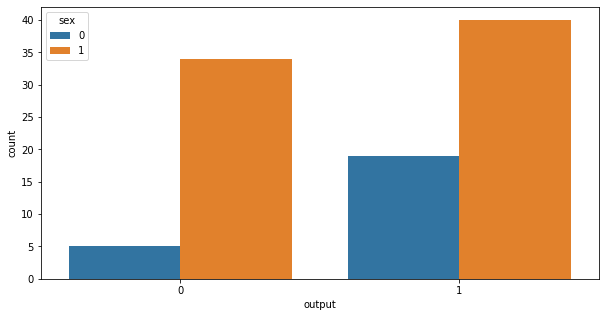

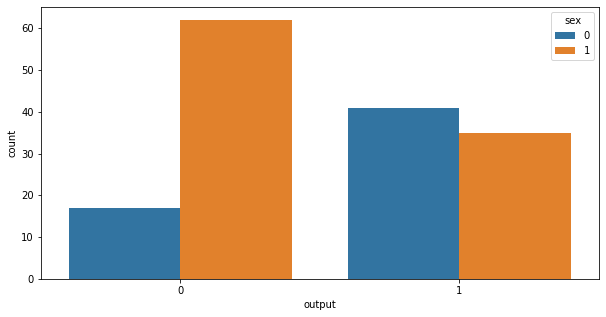

In [12]:
#lets divide on the basis of cholestoral  level
chol_1=df[df["chol"]<200]
chol_3=df[df["chol"]>=240]
chol_2=df[(df["chol"]>=200) & (df["chol"]<=239)]
col=[chol_1,chol_2,chol_3]
for i in col:
    plt.figure(figsize=(10,5))
    sns.countplot(x="output",hue="sex",data=i)
  

**Observation:**
we can observe that male who have moderate cholestoral level are more prone to  heart attack i.e cholestoral level b/w 200 and 239**
     

In [13]:
df.describe(percentiles=[.25,.50,.75,.98,.99])#checking for outliers,looking good 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
98%,70.000000,1.000000,3.000000,177.840000,353.960000,1.000000,1.000000,186.960000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000
99%,71.000000,1.000000,3.000000,180.000000,406.740000,1.000000,1.980000,191.960000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Preparing the model**

In [14]:
#scaling the data using Standardscalar
scaled=StandardScaler().fit_transform(df.drop("output",axis=1))
scaled
scaled=pd.DataFrame(scaled,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'])
scaled.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [15]:
X=scaled
y=df[["output"]]
#dividing the dataset intto input and output variables 

In [16]:
#spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
gc.collect()#memory clearing 

97005

In [18]:
print(y_train.value_counts()[0]/len(y_train),"% of label 0 in train data")
print(y_train.value_counts()[1]/len(y_train),"% of label 1 in train data")
print(y_test.value_counts()[0]/len(y_test),"% of label 0 in train data")
print(y_test.value_counts()[1]/len(y_test),"% of label 1 in train data")

#we can see that almost good amount of data is distributed in train and test

0.45754716981132076 % of label 0 in train data
0.5424528301886793 % of label 1 in train data
0.45054945054945056 % of label 0 in train data
0.5494505494505495 % of label 1 in train data


In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#shape of train and test data


(212, 13)
(212, 1)
(91, 13)
(91, 1)


In [20]:
#fitting the models and predicting the accuracy scores of default models and cross validation scores as well
model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier(),
      RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
model_score=pd.DataFrame(columns=["Model","Accuracy","CV_Mean_Accuracy"])
for m in model:
    m.fit(X_train,y_train)
    pred=m.predict(X_test)
    print("Accuracy score of {} model is".format(m),accuracy_score(y_test,pred),"\n")
    cv=cross_val_score(estimator=m,X=X,y=y,scoring="accuracy",cv=10)
    print("Cross validation score of {} model is ".format(m),list(cv),"\n")
    print("Mean score of cross validation of {} model is ".format(m),cv.mean(),"\n")
    print("confusion matrix for{} model".format(m),"\n",confusion_matrix(y_test,pred))
    print("\n",classification_report(y_test,pred))
    print("------------------------------------------------------------------------------------")
    print("\n")
    model_score=model_score.append([{"Model":m,"Accuracy":accuracy_score(y_test,pred),"CV_Mean_Accuracy":cv.mean()}],ignore_index=True)

Accuracy score of LogisticRegression() model is 0.8131868131868132 

Cross validation score of LogisticRegression() model is  [0.8709677419354839, 0.8064516129032258, 0.8387096774193549, 0.9, 0.8333333333333334, 0.7666666666666667, 0.8666666666666667, 0.8333333333333334, 0.7, 0.7] 

Mean score of cross validation of LogisticRegression() model is  0.8116129032258066 

confusion matrix forLogisticRegression() model 
 [[32  9]
 [ 8 42]]

               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

------------------------------------------------------------------------------------


Accuracy score of DecisionTreeClassifier() model is 0.7142857142857143 

Cross validation score of DecisionTreeClassifier() model is  [0.774193548

In [21]:
model_score
#observations:best model is random forest in terms of cv scores and worst model is DT

,Model,Accuracy,CV_Mean_Accuracy
0,LogisticRegression(),0.813187,0.811613
1,DecisionTreeClassifier(),0.714286,0.778387
2,GaussianNB(),0.835165,0.805054
3,SVC(),0.813187,0.828280
4,KNeighborsClassifier(),0.879121,0.818387
5,"(DecisionTreeClassifier(max_features='auto', r...",0.813187,0.838172
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.802198,0.811290
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.780220,0.804731


In [22]:
gc.collect()#clearing memory

288

**Observations:**
* It is observed that among above models Random Forrest model is performed very well in terms of cross validation accuracy and DecsionTree classifier came to be worst performer.
* Cosndering -Logistic Regression ,Support Vector Machines ,Random Forest Classifier,KNN,AdaBoost models and finding the best hyperparameters


**Lets tune the hyperparameters and see whether accuracy score is improved**

In [23]:
#LogisticRegression model
log=LogisticRegression()
param_grid={"C":[0.001,0.01,0.1,0.5,1,2,10], "penalty":['l1', 'l2'],"max_iter":[50,100,200,300] }
grid_lr=GridSearchCV(estimator=log,param_grid=param_grid,
                     scoring="accuracy",cv=10,return_train_score=True)
grid_lr.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 10],
                         'max_iter': [50, 100, 200, 300],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [24]:
print(grid_lr.best_params_)#best params obtained by grid search 
                 

{'C': 0.5, 'max_iter': 50, 'penalty': 'l2'}


In [25]:
#lest fit the LR model with best parameters and check the accuracy
lr=LogisticRegression(C=0.5,max_iter=50,penalty='l2',random_state=100)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
acclr=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred),"accuracy score")
cv_lr=cross_val_score(estimator=lr,X=X,y=y,cv=10)
print(cv_lr.mean(),"mean_cv_accuracy score")
#we can observe cv accuracy score has been is quite decreased

0.8131868131868132 accuracy score
0.8082795698924732 mean_cv_accuracy score


In [26]:
#svm model
svm=SVC()
param_grid={"C":[0.001,0.01,0.1,0.5,1,2,10,20],"kernel":['linear', 'poly', 'rbf',],"gamma":[1e-1,1e-2,1e-4,1,2]}
grid_svm=GridSearchCV(estimator=svm,cv=10,param_grid=param_grid,scoring="accuracy",
                     return_train_score=True)
grid_svm.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20],
                         'gamma': [0.1, 0.01, 0.0001, 1, 2],
                         'kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [27]:
print(grid_svm.best_params_)#best prams for svc

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


In [28]:
#lest fit the svc model with best model and check the accuracy
svm=SVC(C=10,gamma=0.1,kernel="linear",random_state=100)
svm.fit(X_train,y_train)
pred=svm.predict(X_test)
accsvm=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred),"accuracy score")
cv_svm=cross_val_score(estimator=svm,X=X,y=y,cv=10)
print(cv_svm.mean(),"mean_cv_accuracy score")
#cv accuracy is increased

0.8131868131868132 accuracy score
0.831505376344086 mean_cv_accuracy score


In [29]:
#KNN model
knn=KNeighborsClassifier()
param_grid={"n_neighbors":range(1,50,5),"leaf_size":range(1,50,5)}
grid_knn=GridSearchCV(estimator=knn,cv=10,param_grid=param_grid,scoring="accuracy",
                     return_train_score=True)
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': range(1, 50, 5),
                         'n_neighbors': range(1, 50, 5)},
             return_train_score=True, scoring='accuracy')

In [30]:
print(grid_knn.best_params_)#best prams for knn

{'leaf_size': 1, 'n_neighbors': 16}


In [31]:
#fitting the model with best parameter
knn=KNeighborsClassifier(leaf_size=1,n_neighbors=16)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
accknn=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred),"accuracy score")
cv_knn=cross_val_score(estimator=knn,X=X,y=y,cv=10)
print(cv_knn.mean(),"mean_cv_accuracy score")
#cv accuracy is increased 

0.8351648351648352 accuracy score
0.8248387096774193 mean_cv_accuracy score


In [32]:
#Random Forest Model
rf=RandomForestClassifier()
param_grid={"n_estimators":[500,1000,2000],"max_depth":[2,3,5]}
grid_rf=GridSearchCV(estimator=rf,cv=10,param_grid=param_grid,scoring="accuracy",
                     return_train_score=True)
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)

{'max_depth': 2, 'n_estimators': 500}


In [33]:
rf=RandomForestClassifier()
param_grid={"min_samples_split":[20,30,50],
           "min_samples_leaf" : [20,30,50]}
grid_rf=GridSearchCV(estimator=rf,cv=10,param_grid=param_grid,scoring="accuracy",
                     return_train_score=True)
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)

{'min_samples_leaf': 20, 'min_samples_split': 50}


In [34]:
#fitting the model with best parametres
rf=RandomForestClassifier(n_estimators=500,max_depth=3,min_samples_split=50,min_samples_leaf=20,random_state=42)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
accrf=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred),"accuracy score")
cv_rf=cross_val_score(estimator=rf,X=X,y=y,cv=10)
print(cv_rf.mean(),"mean_cv_accuracy score")


0.8571428571428571 accuracy score
0.8418279569892473 mean_cv_accuracy score


In [35]:
#lets use xgboost model
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
accxgb=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
cv_xgb=cross_val_score(estimator=xgb,X=X,y=y,cv=10)
print(cv_xgb.mean(),"mean_cv_accuracy score")



[21:40:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8021978021978022
[21:40:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to

In [36]:
#finding best parameters for xgboost model
params = {'learning_rate': [0.2,.6,.8,1],
          'max_depth': [2,5,8]
         }
grid_xgb=GridSearchCV(estimator=xgb,param_grid=params,cv=10,scoring="accuracy")
grid_xgb.fit(X_train,y_train)
print(grid_xgb.best_params_)


[21:40:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [37]:
params = {'n_estimators': [200,400,600,1000],
          "subsample": [0.3, 0.6, 0.9],
         }
grid_xgb=GridSearchCV(estimator=xgb,param_grid=params,cv=10,scoring="accuracy")
grid_xgb.fit(X_train,y_train)
print(grid_xgb.best_params_)

[21:40:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [38]:
xgb=XGBClassifier()
params = {'n_estimators': [100,200],
          "subsample": [0.3,0.4,],
          "learning_rate":[0.2,0.3],"max_depth":[2,3]}
grid_xgb=GridSearchCV(estimator=xgb,param_grid=params,cv=10,scoring="accuracy")
grid_xgb.fit(X_train,y_train)
print(grid_xgb.best_params_)
#finding the best parametres

[21:40:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [39]:
#fitting model with best params
xgb=XGBClassifier(n_estimators =100,subsample=0.3,learning_rate=0.2,max_depth=3)
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
accxgbf=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
cv_xgb=cross_val_score(estimator=xgb,X=X,y=y,scoring="accuracy",cv=10)
print(cv_xgb.mean(),"mean_cv_accuracy score")

[21:41:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8241758241758241
[21:41:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to

In [40]:
abc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))
param_grid=[{'n_estimators':[50,100,150],"learning_rate":[0.01,0.1,0.2],
            "algorithm":['SAMME'],"random_state":[40,100]}]
abc_grid=GridSearchCV(estimator=abc,param_grid=param_grid,scoring="accuracy",cv=10,return_train_score=True)
abc_grid.fit(X_train,y_train)
print(abc_grid.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 40}


In [41]:
abc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),algorithm="SAMME",
                      learning_rate=0.1,n_estimators=100,random_state=40)
abc.fit(X_train,y_train)
pred=abc.predict(X_test)
accabc=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
cv_abc=cross_val_score(estimator=abc,X=X,y=y,scoring="accuracy",cv=10)
print(cv_abc.mean(),"mean_cv_accuracy score")

0.8021978021978022
0.8180645161290323 mean_cv_accuracy score


In [42]:
#model scores after hyper parametre tuning
model_score=pd.DataFrame(columns=["Model","Accuracy","CV_Mean_Accuracy"])
model_score=model_score.append([{"Model":"LR","Accuracy":acclr,"CV_Mean_Accuracy":cv_lr.mean()}],ignore_index=True)
model_score=model_score.append([{"Model":"SVC","Accuracy":accsvm,"CV_Mean_Accuracy":cv_svm.mean()}],ignore_index=True)
model_score=model_score.append([{"Model":"knn","Accuracy":accknn,"CV_Mean_Accuracy":cv_knn.mean()}],ignore_index=True)
model_score=model_score.append([{"Model":"RF","Accuracy":accrf,"CV_Mean_Accuracy":cv_rf.mean()}],ignore_index=True)
model_score=model_score.append([{"Model":"XGBoost","Accuracy":accxgbf,"CV_Mean_Accuracy":cv_xgb.mean()}],ignore_index=True)
model_score=model_score.append([{"Model":"AdaBoost","Accuracy":accabc,"CV_Mean_Accuracy":cv_abc.mean()}],ignore_index=True)

In [43]:
model_score

,Model,Accuracy,CV_Mean_Accuracy
0,LR,0.813187,0.808280
1,SVC,0.813187,0.831505
2,knn,0.835165,0.824839
3,RF,0.857143,0.841828
4,XGBoost,0.824176,0.838172
5,AdaBoost,0.802198,0.818065


**Observation:**
It is observed that random forest model performed quite well among all models and aroud 84% percentage of accuracy is predicted in terms of cross validation accuracy which is pretty much good.

In [70]:
#Choosing Random Forest 
rf=RandomForestClassifier(n_estimators=500,max_depth=3,min_samples_split=50,min_samples_leaf=20,random_state=42)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
accrf=accuracy_score(y_test,pred)
print("Accuracy score of final model is",round(accuracy_score(y_test,pred)*100,2),"%")
print("\nConfusion Matrix")
print(confusion_matrix(y_test,pred),"\n")
print("Classifiaction Report:","\n",classification_report(y_test,pred))
cv_rf=cross_val_score(estimator=rf,X=X,y=y,cv=10)
print("Cross Validation Scores are:",cv_rf)
print("\n")
print("Mean_Accuracy_Score of final model is",round(cv_rf.mean()*100,2),"%")


Accuracy score of final model is 85.71 %

Confusion Matrix
[[34  7]
 [ 6 44]] 

Classifiaction Report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

Cross Validation Scores are: [0.83870968 0.80645161 0.80645161 0.96666667 0.9        0.83333333
 0.83333333 0.86666667 0.7        0.86666667]


Mean_Accuracy_Score of final model is 84.18


Text(0.5, 1.0, 'Confusion matrix of Random Forest')

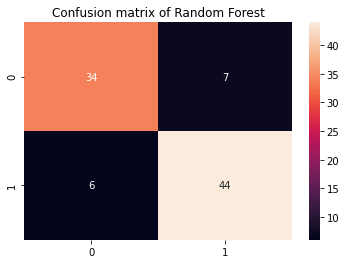

In [71]:
#visualizing the confusion matrix of final model
matrix=confusion_matrix(y_test,pred)
sns.heatmap(matrix,annot=True)
plt.title("Confusion matrix of Random Forest")


  ****Visualising the important features of the final model to predict Heart Attack****    

				 Important features of RandomForest Model
				******************************************
				    Accuracy of the Model is  84.18 %


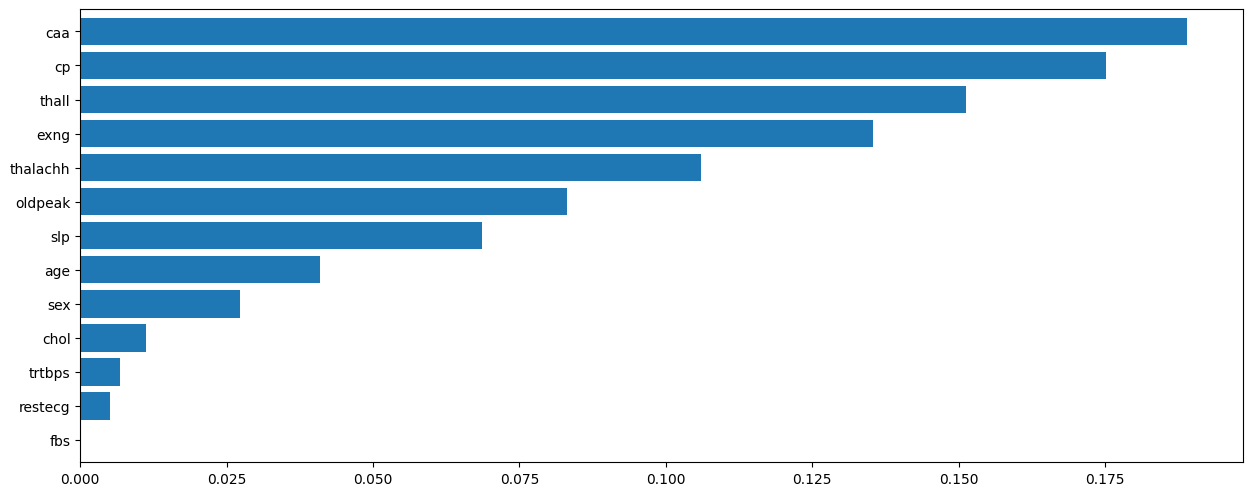

In [79]:
print("\t\t\t\t","Important features of RandomForest Model")
plt.figure(figsize=(15,6),dpi=100)
pd.Series(rf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('\t\t\t\t******************************************')
print("\t\t\t\t    Accuracy of the Model is ",round(cv_rf.mean()*100,2),"%")

In [80]:
import joblib

In [81]:
joblib.dump(rf,"RF_Heartattack_Classification.pkl")

['RF_Heartattack_Classification.pkl']